# Teuvo

> Self-Organizing Map (SOM)

## Design Philosophy

Developed through the innovative **"SolveIt"** tool and methodology currently featured at [Answer.ai](https://www.answer.ai), this Python package embodies a transformative approach to problem-solving. Rather than treating AI as a mysterious black box that simply produces answers, it leverages **AI as an illuminating tool that deepens our understanding of problems and guides us toward solutions**.

At its core, the package draws inspiration from George Pólya's seminal "How to Solve It" framework. What makes this implementation unique is its radical commitment to transparency and literate programming - the entire development process is meticulously documented in this [**"How was it created?" notebook**](workflow/how-was-it-created.ipynb), serving as both a comprehensive guide and a testament to the step-by-step problem-solving methodology.

The package's **source code emerges naturally from this foundational notebook**, carefully refactoring the core functionality that was thoughtfully developed through deliberate, incremental steps. This approach ensures that every component is not only well-documented but also deeply understood.

## Features

- Multiple initialization methods:
  - Random initialization
  - PCA-based initialization (for faster convergence)
- Flexible training options:
  - Customizable learning rate schedules
  - Adjustable neighborhood functions
  - Quantization and Topographic Errors monitoring plots during training:

![](/img/som-training-in-action.gif)

- Comprehensive quality metrics:
  - Quantization Error
  - Topographic Error
- Rich visualization tools:
  - U-Matrix visualization
  - Hit histograms and Component planes (coming soon)



## Installation

```bash
pip install teuvo
```

## Quick Start

Epoch,QE,TE
1,2.0001,2.0590
2,1.9462,4.7301
3,1.8539,0.6121
4,1.8458,1.5582
5,1.7964,1.8364
6,1.7228,0.7791
7,1.6385,0.4452
8,1.5939,0.3339
9,1.5624,0.3339
10,1.4959,0.5565


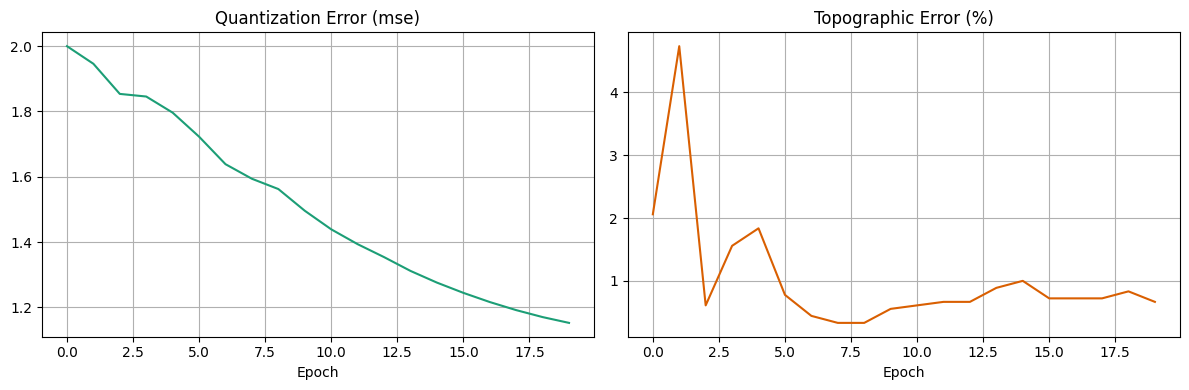

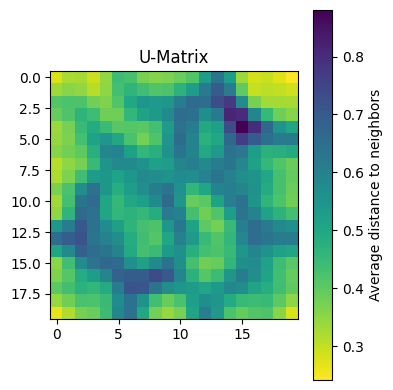

In [ ]:
#| eval: false
from teuvo.core import SOM
import numpy as np
from sklearn.datasets import load_digits

# Load and normalize MNIST data
X, y = load_digits(return_X_y=True)
X_norm = (X - np.mean(X, axis=-1, keepdims=True))/X.max()

# Create and train SOM
som = SOM(grid_sz=(20,20), input_dim=64, init='pca')
som.fit(X_norm, n_epochs=20, verbose=True)

# Visualize results
som.plot_umatrix(figsize=(4,4))

## Detailed Example: MNIST Digit Classification

Epoch,QE,TE
1,1.9399,1.3912
2,2.0015,1.6694
3,1.9254,2.7824
4,1.7919,0.6121
5,1.7639,1.1686
6,1.7188,0.7791
7,1.6138,0.6121
8,1.5829,0.4452
9,1.5376,0.2782
10,1.4790,0.5008


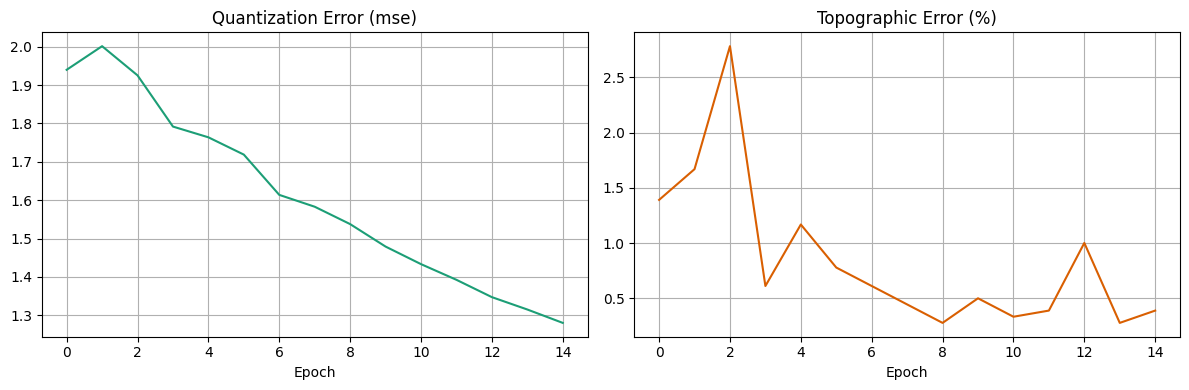

In [ ]:
#| eval: false
from teuvo.core import SOM, Scheduler
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load and preprocess data
X, y = load_digits(return_X_y=True)
X_norm = (X - np.mean(X, axis=-1, keepdims=True))/X.max()

# Initialize SOM
som = SOM(
    grid_sz=(20,20),
    input_dim=64,
    init='pca'  # Use PCA initialization
)

# Create custom schedulers
lr_scheduler = Scheduler(start_val=1.0, end_val=0.01, 
                         step_size=200, n_samples=len(X), n_epochs=20)
sigma_scheduler = Scheduler(start_val=10.0, end_val=1.0, 
                            step_size=200, n_samples=len(X), n_epochs=20)

# Train
weights, qe_errors, te_errors = som.fit(
    X_norm,
    n_epochs=15,
    lr_scheduler=lr_scheduler,
    sigma_scheduler=sigma_scheduler
)

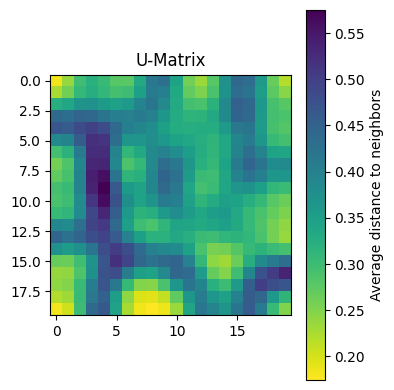

In [ ]:
#| eval: false
som.plot_umatrix(figsize=(4,4))

## Contributing

We welcome contributions! Please see our contributing guidelines for details.


## References

- Kohonen, T. (1982). Self-organized formation of topologically correct feature maps
- Kohonen, T. (2013). Essentials of the self-organizing map
- Polya, G. (1945). How to Solve It


## License

Apache 2.0

## Acknowledgments

Named in honor of Teuvo Kohonen, who introduced the Self-Organizing Map algorithm.